# Sprawozdanie z MIO laboratorium 10 - Marcin Knapczyk

# Zadanie 1

Proszę pobrać pliki set1.csv i set2.csv. Dla obu proszę zaproponować klasyfikator oparty na każdym zaprezentowanym algorytmie oraz na sieci neuronowej wielowarstwowej (o zaproponowanej przez państwa strukturze). Proszę porównać wyniki i pokazać na rysunku jak przebiegła klasyfikacja w każdym wypadku. Dla drzew decyzyjnych, proszę narysować drzewa powstałe dla obu zbiorów.

Jaki algorytm sprawdzał się najlepiej?


### Set1 ###

Decision Tree - Set1
Train accuracy: 1.0000
Test accuracy: 1.0000
Confusion Matrix:
[[33  0]
 [ 0 47]]
Training time: 0.0024 s
Inference time: 0.0007 s


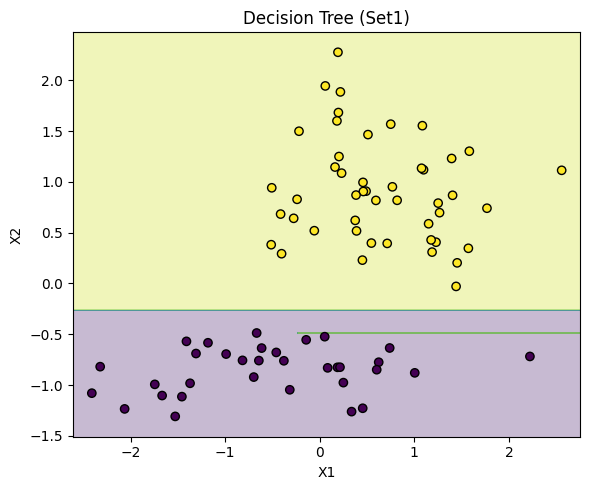

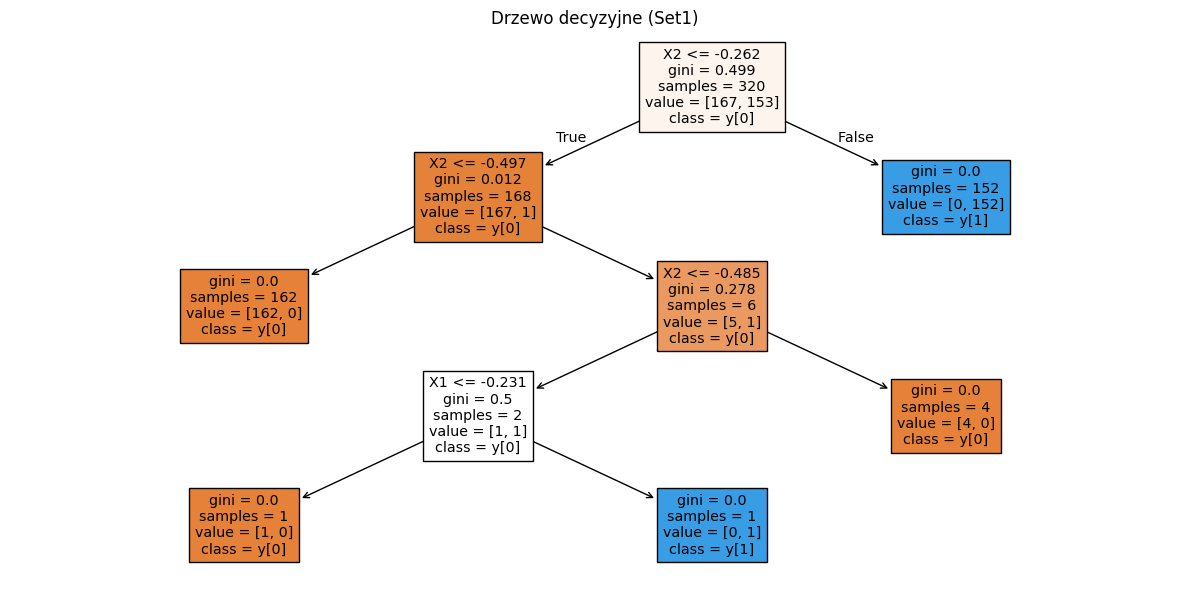


Random Forest - Set1
Train accuracy: 1.0000
Test accuracy: 1.0000
Confusion Matrix:
[[33  0]
 [ 0 47]]
Training time: 0.2654 s
Inference time: 0.0225 s


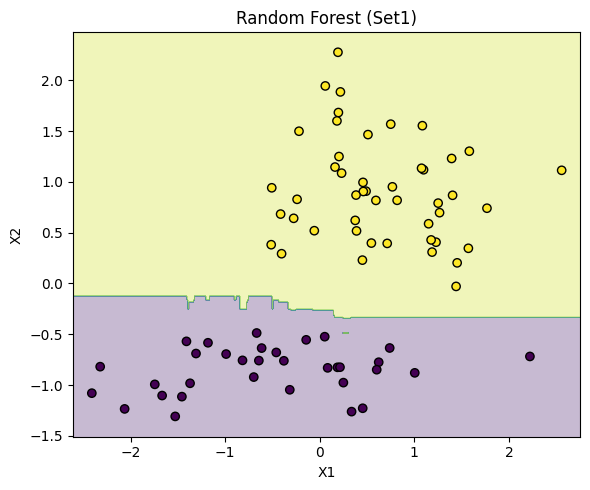


SVM - Set1
Train accuracy: 0.9969
Test accuracy: 1.0000
Confusion Matrix:
[[33  0]
 [ 0 47]]
Training time: 0.0070 s
Inference time: 0.0059 s


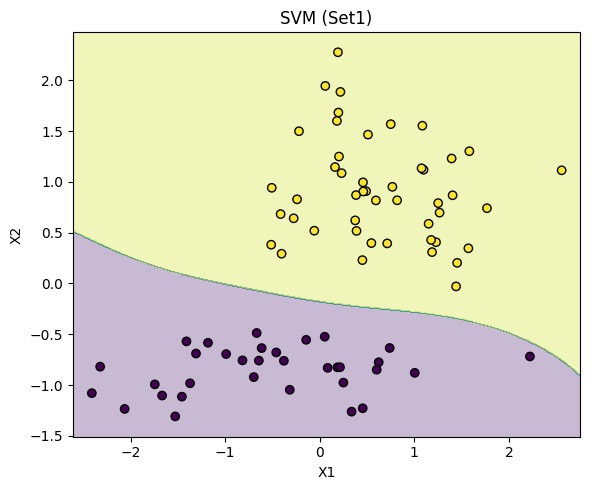


KNN - Set1
Train accuracy: 0.9938
Test accuracy: 1.0000
Confusion Matrix:
[[33  0]
 [ 0 47]]
Training time: 0.0017 s
Inference time: 0.0298 s


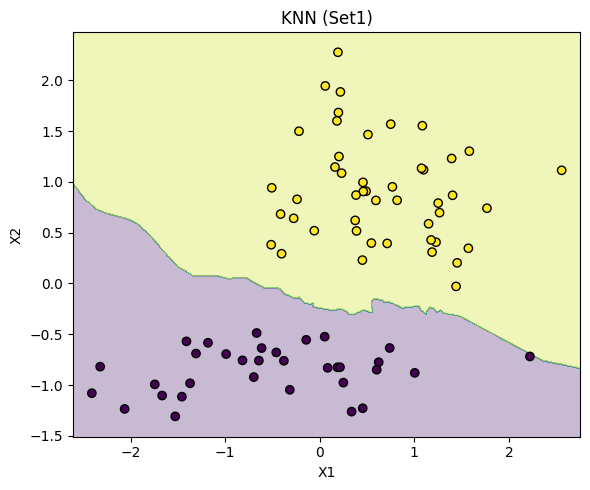


MLP - Set1
Train accuracy: 0.9969
Test accuracy: 1.0000
Confusion Matrix:
[[33  0]
 [ 0 47]]
Training time: 0.2253 s
Inference time: 0.0007 s


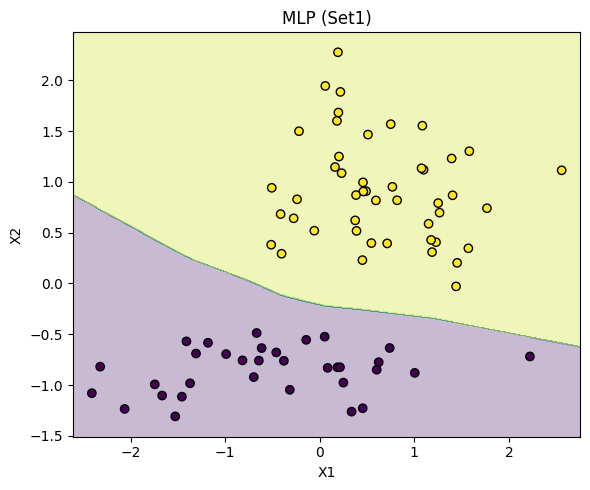


### Set2 ###

Decision Tree - Set2
Train accuracy: 1.0000
Test accuracy: 0.9375
Confusion Matrix:
[[31  2]
 [ 3 44]]
Training time: 0.0023 s
Inference time: 0.0007 s


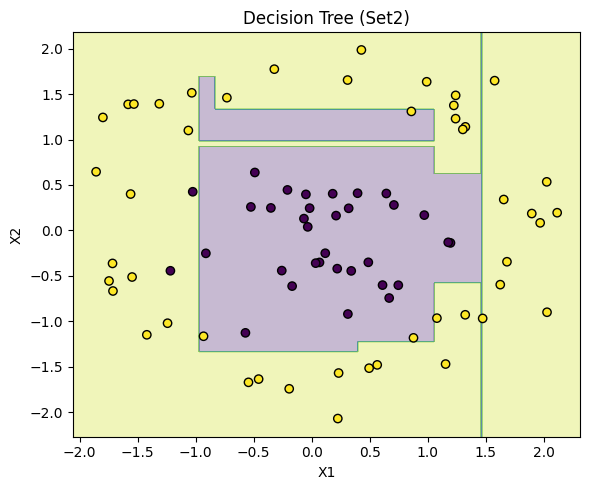

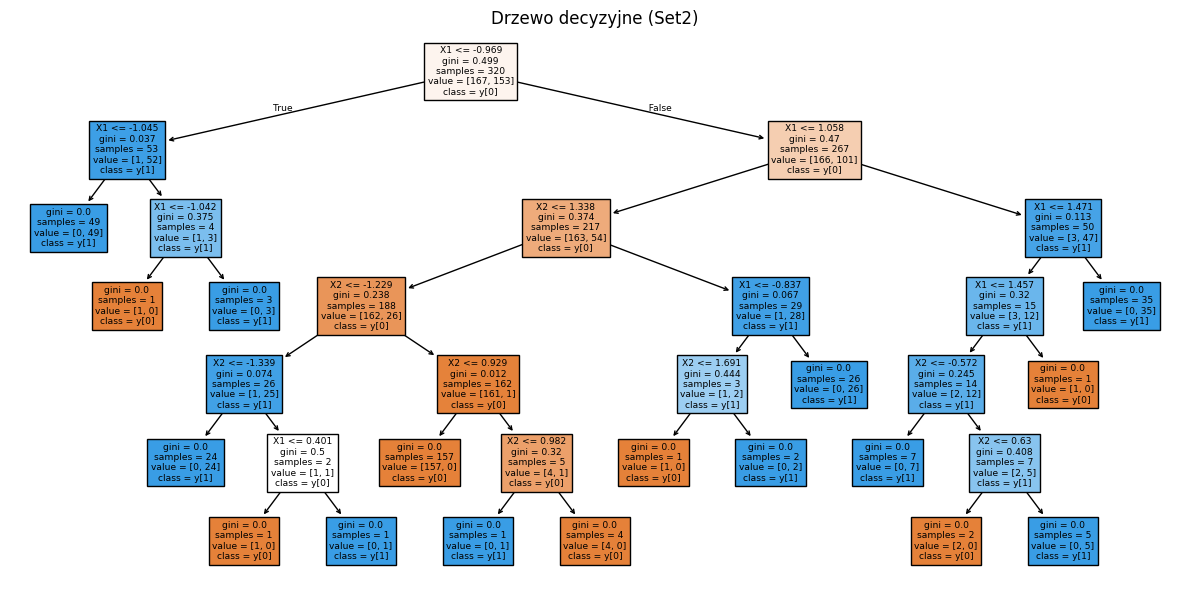


Random Forest - Set2
Train accuracy: 1.0000
Test accuracy: 0.9625
Confusion Matrix:
[[32  1]
 [ 2 45]]
Training time: 0.1939 s
Inference time: 0.0233 s


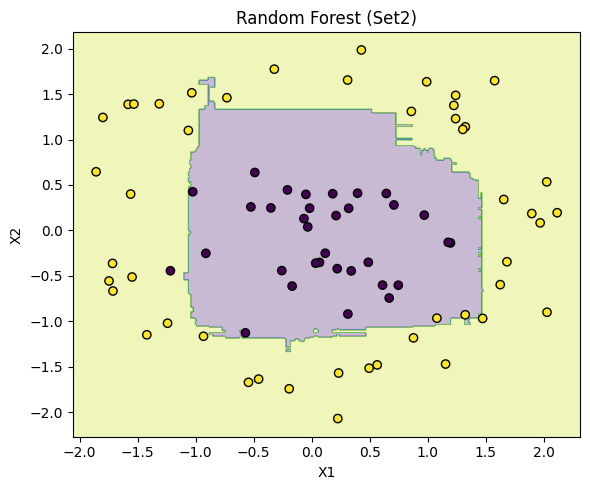


SVM - Set2
Train accuracy: 0.9844
Test accuracy: 1.0000
Confusion Matrix:
[[33  0]
 [ 0 47]]
Training time: 0.0111 s
Inference time: 0.0038 s


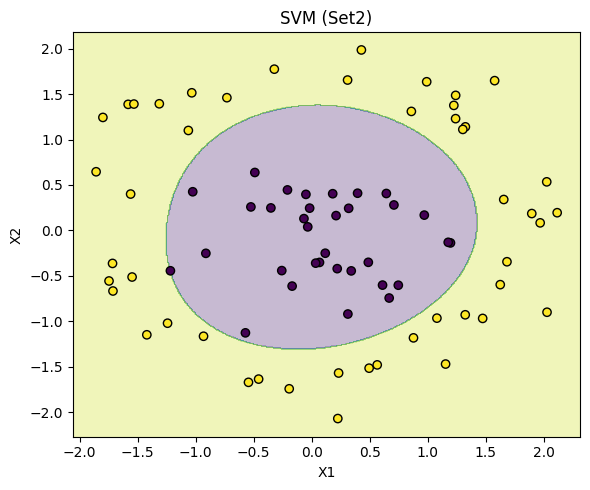


KNN - Set2
Train accuracy: 0.9844
Test accuracy: 0.9875
Confusion Matrix:
[[32  1]
 [ 0 47]]
Training time: 0.0016 s
Inference time: 0.0311 s


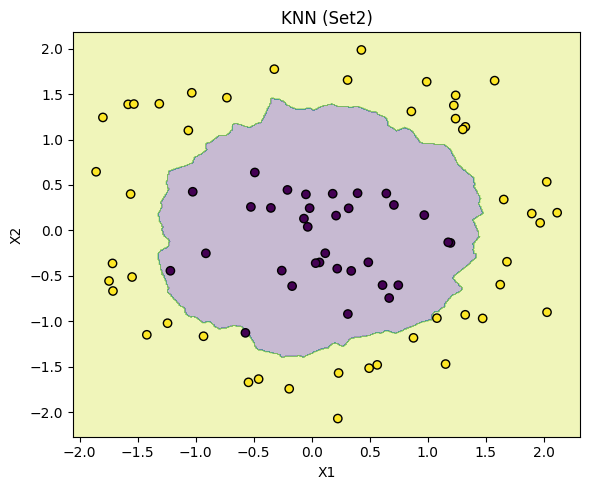


MLP - Set2


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Train accuracy: 0.9906
Test accuracy: 1.0000
Confusion Matrix:
[[33  0]
 [ 0 47]]
Training time: 0.5291 s
Inference time: 0.0011 s


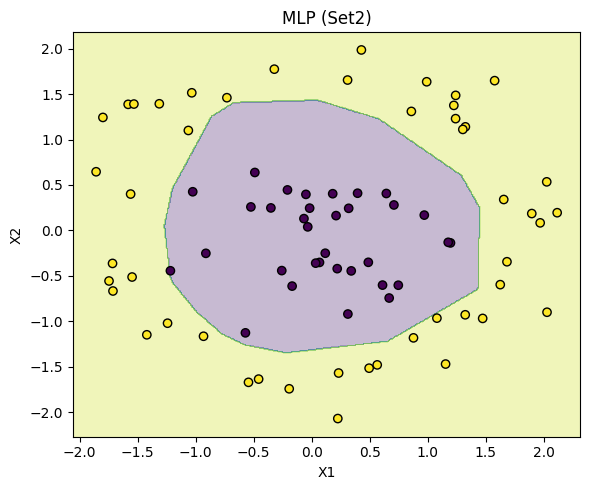


### SUMMARY ###

  Dataset     Classifier  Train Accuracy  Test Accuracy  Training Time (s)  \
0    Set1  Decision Tree        1.000000         1.0000           0.002421   
1    Set1  Random Forest        1.000000         1.0000           0.265357   
2    Set1            SVM        0.996875         1.0000           0.007049   
3    Set1            KNN        0.993750         1.0000           0.001745   
4    Set1            MLP        0.996875         1.0000           0.225260   
7    Set2            SVM        0.984375         1.0000           0.011122   
9    Set2            MLP        0.990625         1.0000           0.529094   
8    Set2            KNN        0.984375         0.9875           0.001595   
6    Set2  Random Forest        1.000000         0.9625           0.193932   
5    Set2  Decision Tree        1.000000         0.9375           0.002264   

   Prediction Time (s)  
0             0.000730  
1             0.022452  
2             0.005862  
3             0.029805 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

set1 = pd.read_csv('set1.csv', header=None)
set2 = pd.read_csv('set2.csv', header=None)

datasets = {
    'Set1': (set1.drop(2, axis=1), set1[2]),
    'Set2': (set2.drop(2, axis=1), set2[2])
}

classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=0),
    'Random Forest': RandomForestClassifier(random_state=0),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'MLP': MLPClassifier(hidden_layer_sizes=(16, 16), max_iter=500, random_state=0)
}

def plot_decision_boundary(clf, X, y, title):
    h = 0.01
    x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
    y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='viridis')
    plt.title(title)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.tight_layout()
    plt.show()


results = []

for set_name, (X, y) in datasets.items():
    print(f"\n### {set_name} ###")

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    for name, clf in classifiers.items():
        print(f"\n{name} - {set_name}")

        start_train = time.time()
        clf.fit(X_train_scaled, y_train)
        end_train = time.time()

        start_pred = time.time()
        y_pred_train = clf.predict(X_train_scaled)
        y_pred_test = clf.predict(X_test_scaled)
        end_pred = time.time()

        acc_train = accuracy_score(y_train, y_pred_train)
        acc_test = accuracy_score(y_test, y_pred_test)
        conf = confusion_matrix(y_test, y_pred_test)

        print(f"Train accuracy: {acc_train:.4f}")
        print(f"Test accuracy: {acc_test:.4f}")
        print(f"Confusion Matrix:\n{conf}")
        print(f"Training time: {(end_train - start_train):.4f} s")
        print(f"Inference time: {(end_pred - start_pred):.4f} s")

        results.append({
          'Dataset': set_name,
          'Classifier': name,
          'Train Accuracy': acc_train,
          'Test Accuracy': acc_test,
          'Training Time (s)': end_train - start_train,
          'Prediction Time (s)': end_pred - start_pred
        })

        plot_decision_boundary(clf, X_test_scaled, y_test, f"{name} ({set_name})")

        if name == 'Decision Tree':
            plt.figure(figsize=(12, 6))
            plot_tree(clf, filled=True, feature_names=['X1', 'X2'], class_names=True)
            plt.title(f"Drzewo decyzyjne ({set_name})")
            plt.tight_layout()
            plt.show()


summary_df = pd.DataFrame(results)
print("\n### SUMMARY ###\n")
print(summary_df.sort_values(by=["Dataset", "Test Accuracy"], ascending=[True, False]))


## Wnioski:
* Wszystkie metody klasyfikacji uzyskały bardzo wysoką skuteczność dla obu zbiorów, co świadczy o wysokiej separowalności danych zarówno w Set1, jak i w Set2

* W zbiorze Set1 wszystkie algorytmy osiągnęły 100% dokładność na danych testowych

* W zbiorze Set2 widać większe zróżnicowanie skuteczności, a najlepsze wyniki osiągnęły:
  * SVM i MLP: 100% dokładność testowa
  * KNN: wynik na poziomie 98.75%
  * Random Forest i Decision Tree osiągnęły troche niższą skuteczność - odpowiednio 96.25 i 93.75%

* Dla zbioru Set2 doszło do lekkiego przeuczenia w przypadku algorytmów Decision Tree i Random Forest. Wskazuje to, że w Set2 granice klas są bardziej złożone i nieregularne, co może powodować trudności dla modeli opartych na podziałach prostymi regułami

* SVM (Support Vector Machine) osiągnął 100% dokładność na obu zbiorach przy relatywnie szybkim czasie  trenowania i predykcji, co czyni go bardzo praktycznym wyborem

* KNN (K-Nearest Neighbors) w obu przypadkach osiągnął powyżej 98%. Jest wrażliwy na rozkład danych i lokalne zmienności, przez co przy trudniejszych danych może delikatnie obniżać skuteczność (jak w  przypadku Set2). Bardzo szybki trening, ale predykcja najwolniejsza

* Sieć neuronowa (MLP) w obu przypadkach uzyskała najwyższą możliwą skuteczność na zbiorze testowym

* Analizując wizualizację zbiorów oraz granice decyzji można zauważyć różnice między algorytmami. Widać na przykład, że algorytmy drzewowe zawsze będą mieć prostokątne granice - zawsze podział danych na dwa. MLP i SVM oferują najgładsze granice decyzyjne - najlepsze uogólnienie problemu

* Najlepiej sprawdzające się algorytmy to SVM i MLP. Są skuteczne, odporne na nadmierne dopasowanie i elastyczne względem rozkładu danych


# Zadanie 2

Dla zbioru danych dotyczących raka piersi (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) proszę zaproponować klasyfikator oparty na każdym zaprezentowanym algorytmie oraz na sieci neuronowej wielowarstwowej (o zaproponowanej przez państwa strukturze). Proszę porównać wyniki.

Dodatkowo proszę o wykonanie wykresów zależności:

- dokładności klasyfikacji w zależności od ilości sąsiadów w algorytmie KNN

- dokładości klasyfikacji drzewa decyzyjnego w zależności od 3 dowolnych parametrów (przykładowo: max_depth, min_samples_split oraz min_samples_leaf).

- dokładności klasyfikacji lasu losowego w zależności od ilości drzew.

Co możemy wnioskować z zaprezentowanych wykresów? Czy wraz z wzrostem "complexity" algorytmu rośnie jego dokładność? W jaki sposób możemy to odnieść do zjawiska przeuczenia?

Jaki algorytm sprawdzał się najlepiej?


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=0),
    'Random Forest': RandomForestClassifier(random_state=0),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'MLP': MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=500, random_state=1)
}

results = []

for name, clf in classifiers.items():
    start_train = time.time()
    clf.fit(X_train_scaled, y_train)
    end_train = time.time()

    start_pred = time.time()
    y_pred_test = clf.predict(X_test_scaled)
    end_pred = time.time()

    acc = accuracy_score(y_test, y_pred_test)

    results.append({
        'Classifier': name,
        'Test Accuracy': acc,
        'Training Time (s)': end_train - start_train,
        'Prediction Time (s)': end_pred - start_pred
    })

summary_df = pd.DataFrame(results)
print("### ALGORITHM COMPARISON ###")
print(summary_df.sort_values(by="Test Accuracy", ascending=False))


### ALGORITHM COMPARISON ###
      Classifier  Test Accuracy  Training Time (s)  Prediction Time (s)
4            MLP       0.982456           1.819606             0.000650
2            SVM       0.973684           0.084671             0.006355
3            KNN       0.956140           0.007713             0.148183
1  Random Forest       0.947368           0.981707             0.036891
0  Decision Tree       0.938596           0.021561             0.000886


## Wnioski:
* Wszystkie algorytmy dobrze poradziły sobie z zadaniem klasyfikacji
* Najlepiej poradził sobie algorytm SVM (Support Vector Machine) z wynikiem test accuracy na poziomie 0.982456. Miał za to najdłuższy czas uczenia i jednocześnie najkrótszy czas predykcji
* Drugim najlepszym wynikiem jest accuracy 0.973684 dla sieci neuronowej
* Najgorzej wypadło Drzewo Decyzyjne z wynikiem 0.938596, który i tak jest dosyć wysoki

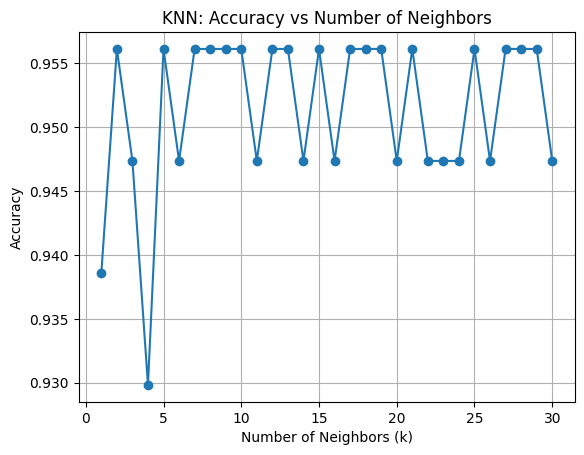

In [ ]:
knn_scores = []
neighbors_range = range(1, 31)

for k in neighbors_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    acc = knn.score(X_test_scaled, y_test)
    knn_scores.append(acc)

plt.figure()
plt.plot(neighbors_range, knn_scores, marker='o')
plt.title("KNN: Accuracy vs Number of Neighbors")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


## Wnioski:
* Największą skuteczność klasyfikacji algorytm KNN osiąga od 2 sąsiadów
* Użycie 4 sąsiadów znacznie pogarsza wynik
* Od 5 sąsiadów w górę skuteczność algorytmu oscyluje na poziomie ~0.95

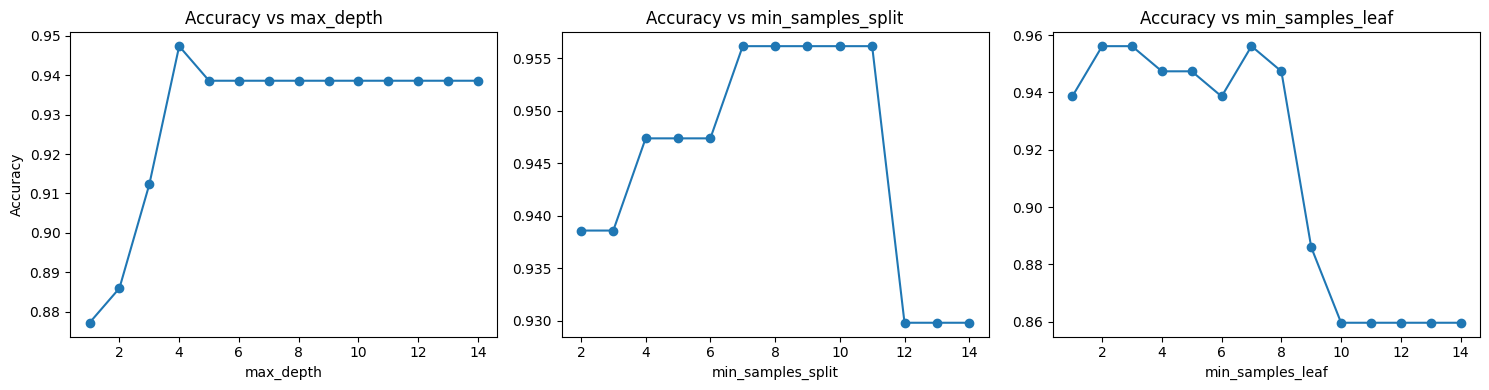

In [ ]:
depths = range(1, 15)
splits = range(2, 15)
leaves = range(1, 15)

plt.figure(figsize=(15, 4))

# max_depth
acc_depth = []
for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=0)
    clf.fit(X_train_scaled, y_train)
    acc_depth.append(clf.score(X_test_scaled, y_test))

plt.subplot(1, 3, 1)
plt.plot(depths, acc_depth, marker='o')
plt.title("Accuracy vs max_depth")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")

# min_samples_split
acc_split = []
for s in splits:
    clf = DecisionTreeClassifier(min_samples_split=s, random_state=0)
    clf.fit(X_train_scaled, y_train)
    acc_split.append(clf.score(X_test_scaled, y_test))

plt.subplot(1, 3, 2)
plt.plot(splits, acc_split, marker='o')
plt.title("Accuracy vs min_samples_split")
plt.xlabel("min_samples_split")

# min_samples_leaf
acc_leaf = []
for l in leaves:
    clf = DecisionTreeClassifier(min_samples_leaf=l, random_state=0)
    clf.fit(X_train_scaled, y_train)
    acc_leaf.append(clf.score(X_test_scaled, y_test))

plt.subplot(1, 3, 3)
plt.plot(leaves, acc_leaf, marker='o')
plt.title("Accuracy vs min_samples_leaf")
plt.xlabel("min_samples_leaf")

plt.tight_layout()
plt.show()


## Wnioski:
* max_depth
  * algorytm osiąga najwiekszą skuteczność dla max_depth równego 4
  * po 4 wykres skuteczności wypłaszcza się na poziomie ~0.94

* min_samples_split
  * największą skuteczność algorytm osiąga dla min_samples_split w zakresie 6-10
  * dla wartości parametru większych od 10 accuracy mocna spada w dół

* min_samples_leaf
  * największą skuteczność algorytm osiąga dla min_samples_leaf w zakresie 2-7
  * dla wartości parametru większych od 7 accuracy spada mocno w dół

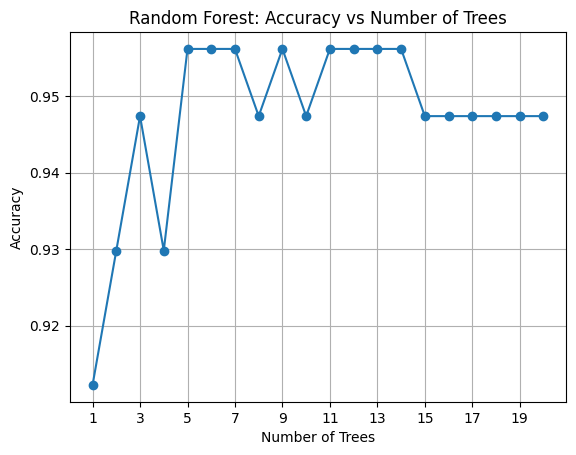

In [11]:
trees_range = range(1, 21, 1)
rf_scores = []

for n in trees_range:
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train_scaled, y_train)
    acc = rf.score(X_test_scaled, y_test)
    rf_scores.append(acc)

plt.figure()
plt.plot(trees_range, rf_scores, marker='o')
plt.title("Random Forest: Accuracy vs Number of Trees")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.xticks(range(1, 21, 2))
plt.grid(True)
plt.show()


## Wnioski:

* Najwyższe accuracy algorytm osiąga do 5 drzew w lesie
* Wysoki poziom utrzymuje się w przedziale 5-14 drzew
* Od 15 wyniki stabilizują się na trochę niższym poziomie

## Wnioski ogólne:
* Z powyższych wykresów widać, że wyniki działania algorytmu można poprawiać tylko do pewnego poziomu poprzez zwiększanie 'complexity' - większą ilość sąsiadów w KNN, ilość drzew w Random Forest, czy zwiększanie głębokości i ilości liści w pojedynczym Decision Tree
* Dla większego 'skomplikowania' algorytmów wyniki przestają się poprawiać, a czasami nawet znacznie się pogarszają
* Można to odnieść do zjawiska przeuczenia - zbyt duże skomplikowanie podziału (linii decyzyjnych) prowadzi do mniejszego uogólnienia klasyfikacji - przeuczenie

# Zadania dla chętnych

Proszę do danych z zadania 2 zastosować jeszcze dodatkowo XGBoost oraz zapoznać się z charakterystyką tego algorytmu.

In [12]:
!pip install xgboost

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:02:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


### XGBoost ###
Accuracy: 0.9649
Train time: 4.1650 s
Prediction time: 0.0139 s

Confusion Matrix:
[[38  4]
 [ 0 72]]

Classification report:
              precision    recall  f1-score   support

   malignant       1.00      0.90      0.95        42
      benign       0.95      1.00      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



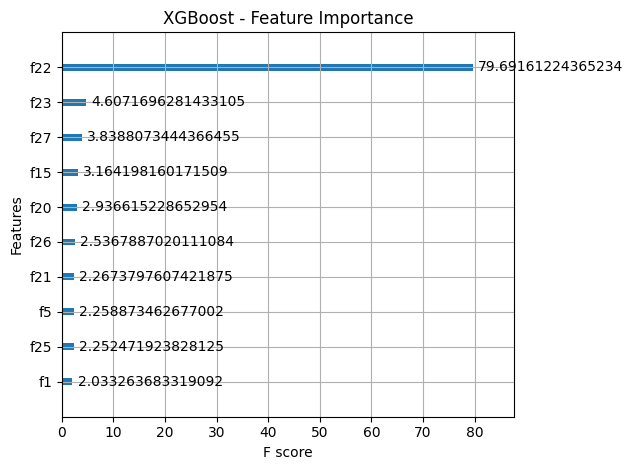

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import xgboost as xgb

data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=1)

start_train = time.time()
xgb_model.fit(X_train_scaled, y_train)
end_train = time.time()

start_pred = time.time()
y_pred = xgb_model.predict(X_test_scaled)
end_pred = time.time()

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=data.target_names)

print("### XGBoost ###")
print(f"Accuracy: {accuracy:.4f}")
print(f"Train time: {end_train - start_train:.4f} s")
print(f"Prediction time: {end_pred - start_pred:.4f} s")
print(f"\nConfusion Matrix:\n{cm}")
print(f"\nClassification report:\n{report}")

xgb.plot_importance(xgb_model, importance_type='gain', title='XGBoost - Feature Importance', max_num_features=10)
plt.tight_layout()
plt.show()


## Wnioski:

* XGBoost (Extreme Gradient Boosting) to algorytm uczenia maszynowego oparty na metodzie gradient boosting
* Działa poprzez kolejne budowanie drzew decyzyjnych, gdzie każde następne drzewo stara się naprawić błędy poprzednich
* Zawiera wbudowane mechanizmy zapobiegające przeuczeniu, takie jak regularyzacja
* Dokładność modelu XGBoost wynosi 0.9649, co jest jednym z najlepszych wyników w porównaniu z innymi klasyfikatorami
* Lepszy wynik uzyskał MLP (0.982456) i SVM (0.973684)
* XGBoost wymaga stosunkowo dużo czasu na uczenie
* Wynik f1-score jest wysoki dla obu klas
* Analizując wykres ważności cech można zauważyć, że:
  * cech f22 dominuje z wartością F-score ~ 79.69, co wskazuje, że ta cecha ma kluczowe znaczenie dla działania modelu
  * model bardzo silnie opiera się na tej jednej cesze przy podejmowaniu decyzji
  * wysoka dominacja jednej cechy może sugerować potrzebę analizy jej wpływu pod kątem nadmiernej zależności modelu